In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import glob
import os,sys
# Import Python Libraries
import iris
import iris.cube
import iris.plot as ipltp
from iris.analysis import MEAN, MAX, SUM, calculus
import copy
from collections import  OrderedDict
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)

In [3]:
acpc_workspace='/group_workspaces/jasmin2/acpc'
sys.path.append('/home/users/pmarinescu/acpc_intercomparison_3')
sys.path.append('/home/users/pmarinescu')
from acpc_intercomparison import load_variable_cube,color,variable_names,directory,filename
#from Setup_intercomparison import load_variable_cube,color,variable_names,directory,filename
from collections import  OrderedDict

In [4]:
# COSMO_KIT  MesoNH_Toulouse  RAMS_CSU  UM_LEEDS  WRF_NASA  WRF_OXF  WRF_PNNL
# MesoN
# Something spscial with UM_LEEDS model, only certain files
model = 'RAMS_CSU'
case = 'CLN'
dx = '500m'
dt = '1m'
#files=sorted(glob.glob(os.path.join(directory[case][dx][dt][model],filename[dx][dt][model])))
files=sorted(glob.glob('/group_workspaces/jasmin2/acpc/houston_deep_convection/RAMS_CSU/CLN/HF/*g3.h5'))

In [5]:
pathnameT+model+'/'+case+'/'+dx+'/'+dt+'/7073/'+'Term_TH'+add_name+'.nc'

NameError: name 'pathnameT' is not defined

In [7]:
pathname='/group_workspaces/jasmin2/acpc/users/pmarin/Model_Vars/'
pathnameT = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'

add_name = '_v2_CHK'
add_name2 = '_CHK'
# load terms
varBT = iris.load(pathnameT+model+'/'+case+'/'+dx+'/'+dt+'/7073/'+'Term_TH'+add_name+'.nc').extract('B_TH')[0]
varBV = iris.load(pathnameT+model+'/'+case+'/'+dx+'/'+dt+'/7073/'+'Term_QV'+add_name+'.nc').extract('B_QV')[0]
varBP = iris.load(pathnameT+model+'/'+case+'/'+dx+'/'+dt+'/7073/'+'Term_P'+add_name+'.nc').extract('B_P')[0]
varVA = iris.load(pathnameT+model+'/'+case+'/'+dx+'/'+dt+'/7073/'+'Term_VADV'+add_name2+'.nc')[0]
varHA = iris.load(pathnameT+model+'/'+case+'/'+dx+'/'+dt+'/7073/'+'Term_HADV'+add_name2+'.nc')[0]
varPG = iris.load(pathnameT+model+'/'+case+'/'+dx+'/'+dt+'/7073/'+'Term_VPGF'+add_name+'.nc')[0]
w = load_variable_cube[model](files,variable_names[model]['W'])
varBC = iris.load(pathnameT+model+'/'+case+'/'+dx+'/'+dt+'/'+'Data_TWC.nc')[0] * -9.8067

In [8]:
print(varBT)
print(varBT * 1)
print(varBV)
print(varBV * 1)
print(varPG)
varPG2 = iris.cube.Cube(varPG.data,units=1)
print(varPG)
print(varPG2)

B_TH / (1)                          (time: 4; geopotential_height: 92; y: 497; x: 497)
     Dimension coordinates:
          time                           x                       -      -       -
          geopotential_height            -                       x      -       -
          y                              -                       -      x       -
          x                              -                       -      -       x
     Auxiliary coordinates:
          model_level_number             -                       x      -       -
          projection_y_coordinate        -                       -      x       -
          latitude                       -                       -      x       x
          longitude                      -                       -      x       x
          projection_x_coordinate        -                       -      -       x
     Attributes:
          Conventions: CF-1.5
unknown / (1)                       (time: 4; geopotential_height: 92; y

In [9]:
print(files[0])
print(files[1])
print(files[2])
print(files[3])
print(np.shape(w))
print(np.shape(varBC))


/group_workspaces/jasmin2/acpc/houston_deep_convection/RAMS_CSU/CLN/HF/a-A-2013-06-19-210000-g3.h5
/group_workspaces/jasmin2/acpc/houston_deep_convection/RAMS_CSU/CLN/HF/a-A-2013-06-19-210003-g3.h5
/group_workspaces/jasmin2/acpc/houston_deep_convection/RAMS_CSU/CLN/HF/a-A-2013-06-19-210006-g3.h5
/group_workspaces/jasmin2/acpc/houston_deep_convection/RAMS_CSU/CLN/HF/a-A-2013-06-19-210009-g3.h5
(4, 95, 500, 500)
(4, 95, 500, 500)


In [10]:
tw = 1
if model == 'RAMS_CSU':
    varBC = varBC[:,2:-1,2:-1,2:-1]
    w = w[:,:,2:-1,2:-1]
    Wmids_t0 = ((w[tw,2:-1,:,:].data+w[tw,1:-2,:,:].data)*0.5)
    Wmids_tm1 = ((w[tw-1,2:-1,:,:].data+w[tw-1,1:-2,:,:].data)*0.5)
    Wmids_tp1 = ((w[tw+1,2:-1,:,:].data+w[tw+1,1:-2,:,:].data)*0.5)
dw_dt = (Wmids_tp1 - Wmids_tm1)/6

In [11]:
#    id1 = np.abs(varBC.coord('geopotential_height').points - 3000).argmin()
#    id2 = np.abs(varBC.coord('geopotential_height').points - 8000).argmin()
#    # To account for upside-down height coordinates
#    idmin = np.min([id1,id2]); idmax = np.max([id1,id2])

#    tmp4D = np.zeros(np.shape(wmid))
#    tmp4D[wmid > w_thr] = 1
#    tmp4D[wmid <= w_thr] = np.nan
#    tmp4D[varBC.core_data()<0.0001] = np.nan
    
    #print(np.shape(test))
#    tmp3D = np.nansum(tmp4D[:,idmin:idmax,:,:],axis=1)/(idmax-idmin); del(tmp4D)
#    col_scr = np.zeros(np.shape(tmp3D))
#    col_scr[tmp3D >= 0.75] = 1; col_scr[tmp3D < 0.75] = np.nan; del(tmp3D)

#    w_col = wmid * col_scr[:,None,:,:]
#    w_col[wmid <= w_thr] = np.nan
#    w_col[varBC.core_data()<0.0001] = np.nan

In [12]:
#    w_col_xy_mean = np.nanmean(w_col,axis=(2,3))
#    var_xy_mean = iris.cube.Cube(w_col_xy_mean,units='m s-1')
#    var_xy_mean.add_aux_coord(varBC.coord('time'),0)
#    var_xy_mean.add_aux_coord(varBC.coord('geopotential_height'),1)
#    var_xy_mean.rename('W')

#    w_col_xy_cnt = np.nansum(w_col,axis=(2,3)) / w_col_xy_mean
#    var_xy_cnt = iris.cube.Cube(w_col_xy_cnt,units='m s-1')
#    var_xy_cnt.add_aux_coord(varBC.coord('time'),0)
#    var_xy_cnt.add_aux_coord(varBC.coord('geopotential_height'),1)
#    var_xy_cnt.rename('cnt')
#    iris.save([var_xy_mean,var_xy_cnt],os.path.join(savedir_i,filename_xy_mean[w_thr]))

#    del(w_col_xy_mean,w_col_xy_cnt,var_xy_mean,var_xy_cnt)

In [13]:
#np.shape(w_col_xyt_mean)

In [14]:
#    w_col_xyt_mean = np.nanmean(w_col,axis=(0,2,3))
#    var_xyt_mean = iris.cube.Cube(w_col_xyt_mean,units='m s-1')
#    var_xyt_mean.add_aux_coord(varBC.coord('geopotential_height'),0)
#    var_xyt_mean.rename('W')

#    w_col_xyt_cnt = np.nansum(w_col,axis=(0,2,3)) / w_col_xyt_mean
#    del(w_col)
#    var_xyt_cnt = iris.cube.Cube(w_col_xyt_cnt,units='m s-1')
#    var_xyt_cnt.add_aux_coord(varBC.coord('geopotential_height'),0)
#    var_xyt_cnt.rename('cnt')

#    iris.save([var_xyt_mean,var_xyt_cnt],os.path.join(savedir_i,filename_xyt_mean[w_thr]))
#    del(w_col_xyt_mean,w_col_xyt_cnt,var_xyt_mean,var_xyt_cnt)


In [15]:
#print(var_xyt_mean.data)

In [16]:
print(np.shape(varPG))
print(np.shape(varHA))
print(np.shape(varVA))
print(np.shape(varPG))
print(np.shape(varPG))
print(np.shape(varBC))
print(np.shape(dw_dt))
print(np.shape(Wmids_t0))


(4, 92, 497, 497)
(4, 92, 497, 497)
(4, 92, 497, 497)
(4, 92, 497, 497)
(4, 92, 497, 497)
(4, 92, 497, 497)
(92, 497, 497)
(92, 497, 497)


In [17]:
#dw_dt[Wmids_t0<5] = np.nan


In [18]:
#dw_dt = dw_dt[~np.isnan(dw_dt)]


In [19]:
#bins = np.arange(-0.2,0.21,0.02)
#cnts,bins2 = np.histogram(dw_dt.flatten(),bins=bins)
#binm = (bins2[1:]+bins2[:-1])/2
#plt.figure
#plt.plot(binm,cnts)

In [20]:
#dw_dt = (Wmids_t0 - Wmids_tm1)/60
#dw_dt = dw_dt[1:-1,:,:]

In [21]:
tnow = 1
#sum_terms = varPG[0,:,1:,:].data + varBV[0,:,1:,:].data + varBC[tnow,:,1:,:].data + varHA[0,:,:-1,:].data + varVA[0,:,1:,:].data + varBT[0,:,1:,:].data
#sum_terms = varPG[0,:,:-1,:].data + varBV[0,:,:-1,:].data + varBC[tnow,:,:-1,:].data + varHA[0,:,1:,:].data + varVA[0,:,:-1,:].data + varBT[0,:,:-1,:].data
sum_terms = varPG[tnow,:,:,:].data + varBV[tnow,:,:,:].data + varBC[tnow,:,:,:].data + varHA[tnow,:,:,:].data + varVA[tnow,:,:,:].data + varBT[tnow,:,:,:].data
sum_terms_P = sum_terms + varBP[tnow,:,:,:].data

In [22]:
varPG.coord('geopotential_height').points[44]

7649.545707980171

In [23]:
    zl = 40; dz = 40
    xl = 250; dx = 200; yl = 250; dy = 200

    
    zl = 50; dz = 30; xl = 266; dx = 10; yl = 409; dy = 10

    
    xl = 245; dx = 10; yl = 358; dy = 10
#    xl = 119; dx = 15; yl = 284; dy = 15

    
#    zl = 45; dz = 10; xl = 247; dx = 10; yl = 357; dy = 10

    zl = 40; dz = 10; xl = 266; dx = 10; yl = 409; dy = 10
    zl = 44; dz = 10; xl = 268; dx = 10; yl = 406; dy = 10

clevels = np.arange(-0.25,0.2501,0.01)
clevels2 = np.arange(-0.1,0.1001,0.01)    
clevels2 = clevels
wlevels = [5,15]

In [24]:
### Example Plot for Publication....

Text(0, 0.5, 'Vertical Velocity Tendency (m s$^{-2}$)')

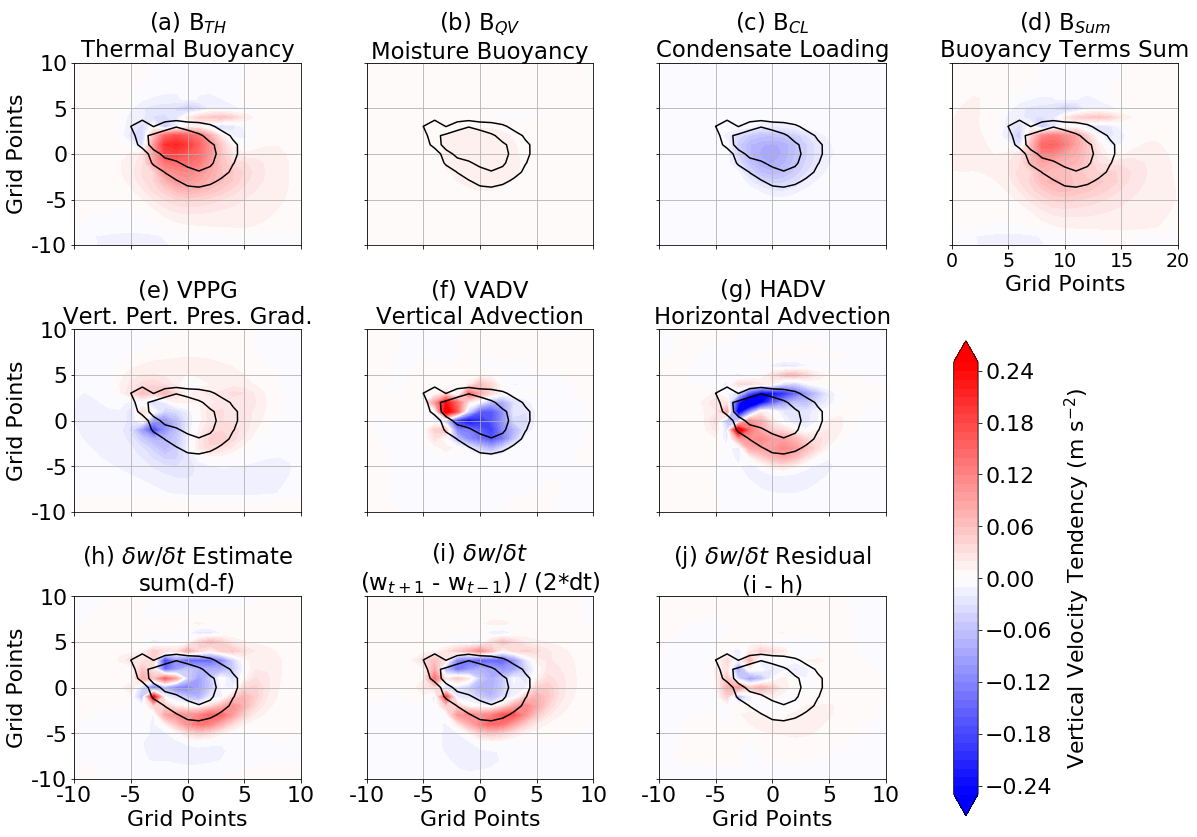

In [25]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 19})
fs2 = 22

xticks = np.arange(0,21,5)
xticklabels = np.arange(-10,11,5)
yticks = np.arange(0,21,5)
yticklabels = np.arange(-10,11,5)

wlevels = [5,15]
wlevels = [3,15]

fig,ax = plt.subplots(3,4,figsize=(17,12))
fig.subplots_adjust(wspace=0.0)

for i in np.arange(0,3):
    for j in np.arange(0,4):
        ax[i,j].set_xticks(xticks)
        ax[i,j].set_yticks(yticks)


# Plan view slice at zl
a = ax[0,0].contourf(varBT[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(a,ax=ax[0,0])
a = ax[0,0].contour(w[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=wlevels,colors='k')
ax[0,0].set_title('(a) B$_{TH}$\nThermal Buoyancy')
ax[0,0].grid()
ax[0,0].set_xticklabels([])
ax[0,0].set_yticklabels(yticklabels,fontsize=fs2)
ax[0,0].set_ylabel('Grid Points',fontsize=fs2)

a = ax[0,1].contourf(varBV[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(a,ax=ax[0,1])
a = ax[0,1].contour(w[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=wlevels,colors='k')
ax[0,1].set_title('(b) B$_{QV}$\nMoisture Buoyancy')
ax[0,1].grid()
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])

b = ax[0,2].contourf(varBC[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(b,ax=ax[0,2])
a = ax[0,2].contour(w[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=wlevels,colors='k')
ax[0,2].set_title('(c) B$_{CL}$\nCondensate Loading')
ax[0,2].grid()
ax[0,2].set_xticklabels([])
ax[0,2].set_yticklabels([])

sum_B = varBC + varBV + varBT
b = ax[0,3].contourf(sum_B[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(b,ax=ax[0,2])
a = ax[0,3].contour(w[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=wlevels,colors='k')
ax[0,3].set_title('(d) B$_{Sum}$\nBuoyancy Terms Sum')
ax[0,3].grid()
ax[0,3].set_yticklabels([])
ax[0,3].set_xlabel('Grid Points',fontsize=fs2)

a = ax[1,0].contourf(varPG[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(a,ax=ax[1,0])
a = ax[1,0].contour(w[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=wlevels,colors='k')
ax[1,0].set_title('(e) VPPG\nVert. Pert. Pres. Grad.')
ax[1,0].grid()
ax[1,0].set_xticklabels([])
ax[1,0].set_yticklabels(yticklabels,fontsize=fs2)
ax[1,0].set_ylabel('Grid Points',fontsize=fs2)

a = ax[1,1].contourf(varVA[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(a,ax=ax[1,1])
a = ax[1,1].contour(w[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=wlevels,colors='k')
ax[1,1].set_title('(f) VADV\nVertical Advection')
ax[1,1].grid()
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])
                                                                                                    
a = ax[1,2].contourf(varHA[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(a,ax=ax[1,2])
a = ax[1,2].contour(w[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=wlevels,colors='k')
ax[1,2].set_title('(g) HADV\nHorizontal Advection')
ax[1,2].grid()
ax[1,2].set_xticklabels([])
ax[1,2].set_yticklabels([])

a = ax[2,0].contourf(sum_terms[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1],levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(a,ax=ax[2,0])
a = ax[2,0].contour(w[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=wlevels,colors='k')
ax[2,0].set_title('(h) $\delta w/\delta t$ Estimate\nsum(d-f)')
ax[2,0].grid()
ax[2,0].set_yticklabels(yticklabels,fontsize=fs2)
ax[2,0].set_xticklabels(xticklabels,fontsize=fs2)
ax[2,0].set_xlabel('Grid Points',fontsize=fs2)
ax[2,0].set_ylabel('Grid Points',fontsize=fs2)

a = ax[2,1].contourf(dw_dt[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1],levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(a,ax=ax[2,1])
a = ax[2,1].contour(w[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=wlevels,colors='k')
ax[2,1].set_title('(i) $\delta w/\delta t$ \n(w$_{t+1}$ - w$_{t-1}$) / (2*dt)')
ax[2,1].grid()
ax[2,1].set_yticklabels([])
ax[2,1].set_xticklabels(xticklabels,fontsize=fs2)
ax[2,1].set_xlabel('Grid Points',fontsize=fs2)
                                                                                                                    
a = ax[2,2].contourf(dw_dt[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1] - sum_terms[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1],levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(a,ax=ax[2,2])
b = ax[2,2].contour(w[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=wlevels,colors='k')
ax[2,2].set_title('(j) $\delta w/\delta t$ Residual\n(i - h)')
ax[2,2].grid()
ax[2,2].set_yticklabels([])
ax[2,2].set_xticklabels(xticklabels,fontsize=fs2)
ax[2,2].set_xlabel('Grid Points',fontsize=fs2)

ax[1,3].axis('off')
ax[2,3].axis('off')

plt.tight_layout()

#fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.79,0.04,0.02,0.55])
cbar = fig.colorbar(a,cax=cbar_ax)
cbar.ax.tick_params(labelsize=fs2) 
cbar.ax.set_ylabel('Vertical Velocity Tendency (m s$^{-2}$)',fontsize=fs2,labelpad=10)

#savename = 'W_Closure_'+model+'_'+case+'_'+str(tnow)+'_'+str(zl)+'_'+str(yl)+'_'+str(xl)+'_JAS_315'
#plt.savefig('/group_workspaces/jasmin2/acpc/public/pmarin/Manuscript/'+savename+'.png')
#plt.savefig('/group_workspaces/jasmin2/acpc/public/pmarin/Manuscript/'+savename+'.pdf')

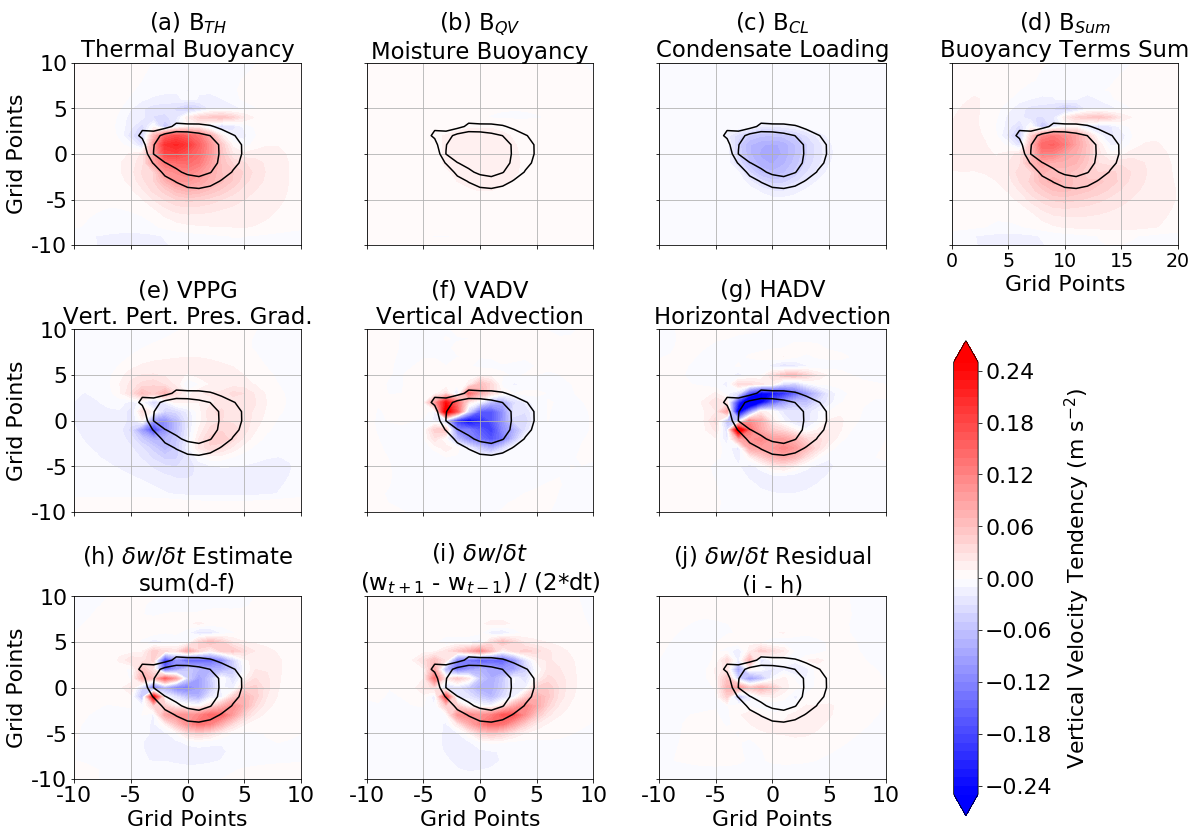

In [27]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 19})
fs2 = 22

xticks = np.arange(0,21,5)
xticklabels = np.arange(-10,11,5)
yticks = np.arange(0,21,5)
yticklabels = np.arange(-10,11,5)

wlevels = [5,15]
wlevels = [3,15]

fig,ax = plt.subplots(3,4,figsize=(17,12))
fig.subplots_adjust(wspace=0.0)

for i in np.arange(0,3):
    for j in np.arange(0,4):
        ax[i,j].set_xticks(xticks)
        ax[i,j].set_yticks(yticks)


# Plan view slice at zl
a = ax[0,0].contourf(varBT[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(a,ax=ax[0,0])
a = ax[0,0].contour(Wmids_t0[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1],levels=wlevels,colors='k')
ax[0,0].set_title('(a) B$_{TH}$\nThermal Buoyancy')
ax[0,0].grid()
ax[0,0].set_xticklabels([])
ax[0,0].set_yticklabels(yticklabels,fontsize=fs2)
ax[0,0].set_ylabel('Grid Points',fontsize=fs2)

a = ax[0,1].contourf(varBV[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(a,ax=ax[0,1])
a = ax[0,1].contour(Wmids_t0[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1],levels=wlevels,colors='k')
ax[0,1].set_title('(b) B$_{QV}$\nMoisture Buoyancy')
ax[0,1].grid()
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])

b = ax[0,2].contourf(varBC[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(b,ax=ax[0,2])
a = ax[0,2].contour(Wmids_t0[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1],levels=wlevels,colors='k')
ax[0,2].set_title('(c) B$_{CL}$\nCondensate Loading')
ax[0,2].grid()
ax[0,2].set_xticklabels([])
ax[0,2].set_yticklabels([])

sum_B = varBC + varBV + varBT
b = ax[0,3].contourf(sum_B[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(b,ax=ax[0,2])
a = ax[0,3].contour(Wmids_t0[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=wlevels,colors='k')
ax[0,3].set_title('(d) B$_{Sum}$\nBuoyancy Terms Sum')
ax[0,3].grid()
ax[0,3].set_yticklabels([])
ax[0,3].set_xlabel('Grid Points',fontsize=fs2)

a = ax[1,0].contourf(varPG[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(a,ax=ax[1,0])
a = ax[1,0].contour(Wmids_t0[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1],levels=wlevels,colors='k')
ax[1,0].set_title('(e) VPPG\nVert. Pert. Pres. Grad.')
ax[1,0].grid()
ax[1,0].set_xticklabels([])
ax[1,0].set_yticklabels(yticklabels,fontsize=fs2)
ax[1,0].set_ylabel('Grid Points',fontsize=fs2)

a = ax[1,1].contourf(varVA[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(a,ax=ax[1,1])
a = ax[1,1].contour(Wmids_t0[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1],levels=wlevels,colors='k')
ax[1,1].set_title('(f) VADV\nVertical Advection')
ax[1,1].grid()
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])
                                                                                                    
a = ax[1,2].contourf(varHA[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(a,ax=ax[1,2])
a = ax[1,2].contour(Wmids_t0[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1],levels=wlevels,colors='k')
ax[1,2].set_title('(g) HADV\nHorizontal Advection')
ax[1,2].grid()
ax[1,2].set_xticklabels([])
ax[1,2].set_yticklabels([])

a = ax[2,0].contourf(sum_terms[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1],levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(a,ax=ax[2,0])
a = ax[2,0].contour(Wmids_t0[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1],levels=wlevels,colors='k')
ax[2,0].set_title('(h) $\delta w/\delta t$ Estimate\nsum(d-f)')
ax[2,0].grid()
ax[2,0].set_yticklabels(yticklabels,fontsize=fs2)
ax[2,0].set_xticklabels(xticklabels,fontsize=fs2)
ax[2,0].set_xlabel('Grid Points',fontsize=fs2)
ax[2,0].set_ylabel('Grid Points',fontsize=fs2)

a = ax[2,1].contourf(dw_dt[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1],levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(a,ax=ax[2,1])
a = ax[2,1].contour(Wmids_t0[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1],levels=wlevels,colors='k')
ax[2,1].set_title('(i) $\delta w/\delta t$ \n(w$_{t+1}$ - w$_{t-1}$) / (2*dt)')
ax[2,1].grid()
ax[2,1].set_yticklabels([])
ax[2,1].set_xticklabels(xticklabels,fontsize=fs2)
ax[2,1].set_xlabel('Grid Points',fontsize=fs2)
                                                                                                                    
a = ax[2,2].contourf(dw_dt[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1] - sum_terms[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1],levels=clevels,cmap=plt.cm.bwr,extend='both')
#plt.colorbar(a,ax=ax[2,2])
ax[2,2].contour(Wmids_t0[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1],levels=wlevels,colors='k')
ax[2,2].set_title('(j) $\delta w/\delta t$ Residual\n(i - h)')
ax[2,2].grid()
ax[2,2].set_yticklabels([])
ax[2,2].set_xticklabels(xticklabels,fontsize=fs2)
ax[2,2].set_xlabel('Grid Points',fontsize=fs2)

ax[1,3].axis('off')
ax[2,3].axis('off')

plt.tight_layout()

#fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.79,0.04,0.02,0.55])
cbar = fig.colorbar(a,cax=cbar_ax)
cbar.ax.tick_params(labelsize=fs2) 
cbar.ax.set_ylabel('Vertical Velocity Tendency (m s$^{-2}$)',fontsize=fs2,labelpad=10)

savename = 'W_Closure_'+model+'_'+case+'_'+str(tnow)+'_'+str(zl)+'_'+str(yl)+'_'+str(xl)+'_JAS_315_WMids'
plt.savefig('/group_workspaces/jasmin2/acpc/public/pmarin/Manuscript/'+savename+'.png')
plt.savefig('/group_workspaces/jasmin2/acpc/public/pmarin/Manuscript/'+savename+'.pdf')

In [25]:
def contiguous_regions(condition):
    """Finds contiguous True regions of the boolean array "condition". Returns
    a 2D array where the first column is the start index of the region and the
    second column is the end index."""

    # Find the indicies of changes in "condition"
    d = np.diff(condition)
    #logging.info(np.shape(d))
    #logging.info(np.shape(d.nonzero()))
    idx, = d.nonzero()

    # We need to start things after the change in "condition". Therefore, 
    # we'll shift the index by 1 to the right.
    idx += 1

    if condition[0]:
        # If the start of condition is True prepend a 0
        idx = np.r_[0, idx]

    if condition[-1]:
        # If the end of condition is True, append the length of the array
        idx = np.r_[idx, condition.size] # Edit

    # Reshape the result into two columns
    idx.shape = (-1,2)
    return idx

In [26]:
print(np.shape(varBC[tnow,:,:,:].data))
print(np.max(Wmids_t0))

(92, 497, 497)
34.145775


In [80]:
varBC_col = varBC[tnow,:,:,:].data / -9.8067

In [81]:
w_thr = 3
wmid_cld = copy.deepcopy(Wmids_t0)
wmid_cld[varBC_col<0.0001] = 0
w_col = np.zeros(np.shape(wmid_cld))
wmax = np.max(wmid_cld,axis=0)
l_ids = np.where(wmax>3)
print(np.shape(l_ids))
cnt_col = 0
for ii in np.arange(0,np.shape(l_ids)[1]):
    #logging.info(l_ids[0][ii])
    #logging.info(np.shape(l_ids[:,ii]))

    id1 = np.abs(varBC.coord('geopotential_height').points - 2000).argmin()
    id2 = np.abs(varBC.coord('geopotential_height').points - 14000).argmin()
    minid = np.min([id1,id2])
    maxid = np.max([id1,id2])
    cur_col = wmid_cld[:,l_ids[0][ii],l_ids[1][ii]]
    cur_col[:minid] = 0
    cur_col[maxid:] = 0
    c_inds = contiguous_regions(cur_col > w_thr)

    dz = 0
    for zz in np.arange(0,len(c_inds)):
        dz_new = np.abs(varBC.coord('geopotential_height').points[c_inds[zz][1]] - varBC.coord('geopotential_height').points[c_inds[zz][0]])
        dz = np.max([dz,dz_new])
        if dz == dz_new:
            mi_id = np.min([c_inds[zz][1],c_inds[zz][0]])
            ma_id = np.max([c_inds[zz][1],c_inds[zz][0]])

    print(ii)
    print(dz)
    if dz > 6000: #only include columns that have continuous regions of this depth
        w_col[mi_id:ma_id,l_ids[0][ii],l_ids[1][ii]] = copy.deepcopy(wmid_cld[mi_id:ma_id,l_ids[0][ii],l_ids[1][ii]])
       # w_col[l_ids[0][ii],mi_id:ma_id,l_ids[1][ii],l_ids[2][ii]] = copy.deepcopy(wvar_cld[l_ids[0][ii],mi_id:ma_id,l_ids[1][ii],l_ids[2][ii]])

        cnt_col = cnt_col + 1
#        logging.info(f'Yes')
#        logging.info(l_ids[0][ii])
#        logging.info(l_ids[1][ii])
#        logging.info(l_ids[2][ii])
#        logging.info(f'Print:Column Max,Min')
#        logging.info(np.nanmax(w_col[l_ids[0][ii],mi_id:ma_id,l_ids[1][ii],l_ids[2][ii]]))
#        logging.info(np.nanmin(w_col[l_ids[0][ii],mi_id:ma_id,l_ids[1][ii],l_ids[2][ii]]))
print(f'Column Count:')
print(cnt_col)
w_col[wmid_cld<w_thr] = np.nan
w_col[w_col<w_thr] = np.nan
print(np.nanmin(w_col))

(2, 3918)
0
0
1
0
2
0
3
0
4
0
5
0
6
0
7
0
8
958.68798828125
9
1180.12060546875
10
1019.4329833984375
11
1652.5999755859375
12
1885.1041259765625
13
1281.292724609375
14
0
15
645.9779052734375
16
1220.2791748046875
17
1431.1673583984375
18
645.9779052734375
19
149.8746337890625
20
149.8746337890625
21
0
22
0
23
0
24
149.8746337890625
25
0
26
472.4793701171875
27
0
28
828.1512451171875
29
645.9779052734375
30
678.276611328125
31
1431.1673583984375
32
1885.1041259765625
33
958.68798828125
34
2129.2337646484375
35
2385.5692138671875
36
824.44873046875
37
574.30126953125
38
2129.2337646484375
39
2385.5692138671875
40
824.44873046875
41
149.8746337890625
42
472.4793701171875
43
0
44
1345.357177734375
45
1577.861328125
46
1220.2791748046875
47
1019.4329833984375
48
149.8746337890625
49
1502.725341796875
50
1885.1041259765625
51
1431.1673583984375
52
149.8746337890625
53
0
54
1885.1041259765625
55
2129.2337646484375
56
1652.5999755859375
57
0
58
0
59
0
60
1885.1041259765625
61
2129.23376464843

4179.1708984375
537
4448.32373046875
538
2700.0
539
244.129638671875
540
0
541
149.8746337890625
542
307.2427978515625
543
472.4793701171875
544
1220.2791748046875
545
1652.5999755859375
546
1431.1673583984375
547
828.1512451171875
548
847.66162109375
549
847.66162109375
550
1052.471923828125
551
1580.630859375
552
500.465087890625
553
769.617919921875
554
769.617919921875
555
244.129638671875
556
1366.13623046875
557
3513.61376953125
558
4704.6591796875
559
5048.32373046875
560
5048.32373046875
561
5004.6591796875
562
3000.0
563
645.9779052734375
564
1019.4329833984375
565
1220.2791748046875
566
828.1512451171875
567
808.34228515625
568
769.617919921875
569
244.129638671875
570
244.129638671875
571
732.96923828125
572
1506.40869140625
573
1366.13623046875
574
1223.5546875
575
1002.1220703125
576
476.6337890625
577
476.6337890625
578
698.06640625
579
908.95458984375
580
664.824951171875
581
1109.80078125
582
2109.4248046875
583
2400.0
584
5304.6591796875
585
5348.32373046875
586
5648.3

1004
149.8746337890625
1005
0
1006
1220.2791748046875
1007
1885.1041259765625
1008
2129.2337646484375
1009
747.7998046875
1010
2008.744140625
1011
3605.74169921875
1012
3213.61376953125
1013
3081.29296875
1014
3148.788818359375
1015
3804.6591796875
1016
3504.6591796875
1017
2904.6591796875
1018
1748.32373046875
1019
900.662109375
1020
600.0
1021
900.0
1022
2700.0
1023
3000.0
1024
2400.0
1025
828.1512451171875
1026
1002.1220703125
1027
2887.9150390625
1028
3233.2308349609375
1029
2654.7220458984375
1030
2129.2337646484375
1031
269.15283203125
1032
828.1512451171875
1033
645.9779052734375
1034
149.8746337890625
1035
0
1036
0
1037
472.4793701171875
1038
1220.2791748046875
1039
1652.5999755859375
1040
1885.1041259765625
1041
712.190185546875
1042
3114.4599609375
1043
2913.61376953125
1044
2702.7255859375
1045
2781.29296875
1046
2548.788818359375
1047
2548.788818359375
1048
2004.6591796875
1049
1704.6591796875
1050
300.662109375
1051
900.0
1052
2100.0
1053
2937.5760498046875
1054
2937.57604

1690
678.276611328125
1691
0
1692
1019.4329833984375
1693
3233.2308349609375
1694
4133.8929443359375
1695
4133.8929443359375
1696
1885.1041259765625
1697
1019.4329833984375
1698
1885.1041259765625
1699
913.036376953125
1700
307.2427978515625
1701
1019.4329833984375
1702
1431.1673583984375
1703
828.1512451171875
1704
149.8746337890625
1705
0
1706
300.0
1707
1200.0
1708
2100.0
1709
300.0
1710
300.0
1711
900.0
1712
900.0
1713
600.0
1714
600.0
1715
0
1716
0
1717
0
1718
0
1719
307.2427978515625
1720
645.9779052734375
1721
2937.5760498046875
1722
3833.8929443359375
1723
3833.8929443359375
1724
2385.5692138671875
1725
1019.4329833984375
1726
307.2427978515625
1727
1220.2791748046875
1728
1019.4329833984375
1729
307.2427978515625
1730
472.4793701171875
1731
0
1732
1500.0
1733
5100.0
1734
2100.0
1735
0
1736
0
1737
0
1738
0
1739
0
1740
149.8746337890625
1741
1979.359130859375
1742
2937.5760498046875
1743
2654.7220458984375
1744
2129.2337646484375
1745
1431.1673583984375
1746
645.9779052734375
17

2284
182.17333984375
2285
879.1708984375
2286
896.31689453125
2287
1885.1041259765625
2288
785.189453125
2289
307.2427978515625
2290
149.8746337890625
2291
900.0
2292
1200.0
2293
165.236572265625
2294
712.190185546875
2295
191.28173828125
2296
1148.32373046875
2297
1148.32373046875
2298
0
2299
307.2427978515625
2300
307.2427978515625
2301
165.236572265625
2302
2100.0
2303
2400.0
2304
1800.0
2305
900.0
2306
157.3681640625
2307
678.276611328125
2308
546.95361328125
2309
1052.471923828125
2310
808.34228515625
2311
0
2312
149.8746337890625
2313
0
2314
307.2427978515625
2315
472.4793701171875
2316
900.662109375
2317
2400.662109375
2318
3300.0
2319
3000.0
2320
2400.0
2321
600.0
2322
785.189453125
2323
769.617919921875
2324
244.129638671875
2325
0
2326
149.8746337890625
2327
0
2328
0
2329
0
2330
0
2331
0
2332
2096.31689453125
2333
2996.31689453125
2334
4179.1708984375
2335
3900.662109375
2336
2400.0
2337
0
2338
785.189453125
2339
476.6337890625
2340
0
2341
0
2342
0
2343
2079.1708984375
2344
3

2940
600.0
2941
496.103271484375
2942
2008.744140625
2943
2182.24267578125
2944
1656.75439453125
2945
600.0
2946
3900.0
2947
3000.0
2948
2400.0
2949
5400.0
2950
3300.0
2951
3000.0
2952
2654.7220458984375
2953
2654.7220458984375
2954
1885.1041259765625
2955
2654.7220458984375
2956
6233.8929443359375
2957
7433.8929443359375
2958
8461.41357421875
2959
7914.4599609375
2960
7413.61376953125
2961
2400.0
2962
500.465087890625
2963
732.96923828125
2964
472.4793701171875
2965
1431.1673583984375
2966
1885.1041259765625
2967
1885.1041259765625
2968
496.103271484375
2969
472.4793701171875
2970
1019.4329833984375
2971
1652.5999755859375
2972
2129.2337646484375
2973
2385.5692138671875
2974
1913.08984375
2975
1652.5999755859375
2976
1652.5999755859375
2977
1885.1041259765625
2978
1431.1673583984375
2979
828.1512451171875
2980
472.4793701171875
2981
472.4793701171875
2982
307.2427978515625
2983
1019.4329833984375
2984
1431.1673583984375
2985
1431.1673583984375
2986
828.1512451171875
2987
1002.12207031

1448.32373046875
3481
1196.31689453125
3482
900.0
3483
1200.0
3484
2100.662109375
3485
1800.0
3486
300.0
3487
900.0
3488
1800.0
3489
2400.0
3490
2700.0
3491
3000.0
3492
3000.0
3493
1200.0
3494
1500.0
3495
1500.0
3496
1800.0
3497
1500.0
3498
149.8746337890625
3499
307.2427978515625
3500
645.9779052734375
3501
472.4793701171875
3502
149.8746337890625
3503
2700.0
3504
3300.0
3505
3000.0
3506
1500.0
3507
2385.5692138671875
3508
732.96923828125
3509
1404.6591796875
3510
879.1708984375
3511
900.662109375
3512
600.0
3513
1496.31689453125
3514
2379.1708984375
3515
900.0
3516
1200.0
3517
1500.0
3518
1800.0
3519
2100.0
3520
2400.0
3521
2400.0
3522
1500.0
3523
1200.0
3524
1500.0
3525
1800.0
3526
1500.0
3527
1200.0
3528
300.0
3529
472.4793701171875
3530
1019.4329833984375
3531
1019.4329833984375
3532
1019.4329833984375
3533
645.9779052734375
3534
3000.0
3535
3300.0
3536
2100.0
3537
900.0
3538
2654.7220458984375
3539
0
3540
698.06640625
3541
1506.40869140625
3542
1103.9970703125
3543
596.3168945312

In [82]:
sum_terms_noPG = sum_terms - varPG[tnow,:,:,:].data #+ (dw_dt - sum_terms)
sum_terms_noBC = sum_terms - varBC[tnow,:,:,:].data #+ (dw_dt - sum_terms)
sum_terms_noBT = sum_terms - varBT[tnow,:,:,:].data #+ (dw_dt - sum_terms)
sum_terms_noHA = sum_terms - varVA[tnow,:,:,:].data #+ (dw_dt - sum_terms)
sum_terms_noVA = sum_terms - varHA[tnow,:,:,:].data #+ (dw_dt - sum_terms)
sum_terms_noBV = sum_terms - varBV[tnow,:,:,:].data #+ (dw_dt - sum_terms)


In [83]:
sum_scr_noBC = sum_terms_noBC[w_col > 0]
sum_scr_noBV = sum_terms_noBV[w_col > 0]
sum_scr_noPG = sum_terms_noPG[w_col > 0]
sum_scr_noBT = sum_terms_noBT[w_col > 0]
sum_scr_noHA = sum_terms_noHA[w_col > 0]
sum_scr_noVA = sum_terms_noVA[w_col > 0]

In [117]:
terms = ['BT','BV','BC','PG','HA','VA','Res']

terms_scr = np.zeros((len(terms),np.shape(w_col)[0],np.shape(w_col)[1],np.shape(w_col)[2]))

for te in np.arange(0,len(terms)):
    if te == 6:
        t_scr_now = dw_dt-sum_terms
    elif te == 0:
        t_scr_now = copy.deepcopy(varBT[tnow,:,:,:].data)
    elif te == 1:
        t_scr_now = copy.deepcopy(varBV[tnow,:,:,:].data)
    elif te == 2:
        t_scr_now = copy.deepcopy(varBC[tnow,:,:,:].data)
    elif te == 3:
        t_scr_now = copy.deepcopy(varPG[tnow,:,:,:].data)
    elif te == 4:
        t_scr_now = copy.deepcopy(varHA[tnow,:,:,:].data)
    elif te == 5:
        t_scr_now = copy.deepcopy(varVA[tnow,:,:,:].data)
    terms_scr[te,:] = t_scr_now      


In [118]:
print(np.nanmax(w_col))

34.145774841308594


In [119]:
w_range = np.arange(3,51.1,4)
w_range_mid = (w_range[:-1]+w_range[1:])/2

w_avg = np.zeros((len(terms),len(w_range)-1,np.shape(w_col)[0]))
t_avg = np.zeros((len(terms),len(w_range)-1,np.shape(w_col)[0]))

for te in np.arange(0,len(terms)):
    print(terms[te])
    for i in np.arange(0,len(w_range)-1):

        w_scr_now = copy.deepcopy(w_col)
        t_scr_now = copy.deepcopy(terms_scr[te,:,:,:])
        t_scr_now[np.isnan(w_col)] = np.nan
        
        w_lo = w_range[i]; w_hi = w_range[i+1]
        w_scr_now[w_col<w_lo] = np.nan
        w_scr_now[w_col>=w_hi] = np.nan
        #print('Finished Screen for W for '+str(w_lo)+' <= w < '+str(w_hi))
        print(np.count_nonzero(~np.isnan(w_scr_now)))

        t_scr_now[w_col<w_lo] = np.nan
        t_scr_now[w_col>=w_hi] = np.nan
        #print('Finished Screen for Term for '+str(w_lo)+' <= w < '+str(w_hi))
        print(np.count_nonzero(~np.isnan(t_scr_now)))
        
        wmean = np.nanmean(w_scr_now,axis=(1,2))
        tmean = np.nanmean(t_scr_now,axis=(1,2))
        
        w_avg[te,i,:] = np.array(wmean)
        t_avg[te,i,:] = np.array(tmean)

BT
761
761
547
547
379
379
249
249
141
141
53
53
17
17
4
4
0
0
0
0
0
0
0
0
BV
761
761
547
547
379
379
249
249
141
141
53
53
17
17
4
4
0
0
0
0
0
0
0
0
BC
761
761
547
547
379
379
249
249
141
141
53
53
17
17
4
4
0
0
0
0
0
0
0
0
PG
761
761
547
547
379
379
249
249
141
141
53
53
17
17
4
4
0
0
0
0
0
0
0
0
HA
761
761
547
547
379
379
249
249
141
141
53
53
17
17
4
4
0
0
0
0
0
0
0
0
VA
761
761
547
547
379
379
249
249
141
141
53
53
17
17
4
4
0
0
0
0
0
0
0
0
Res
761
761
547
547
379
379
249
249
141
141
53
53
17
17
4
4
0
0
0
0
0
0
0
0


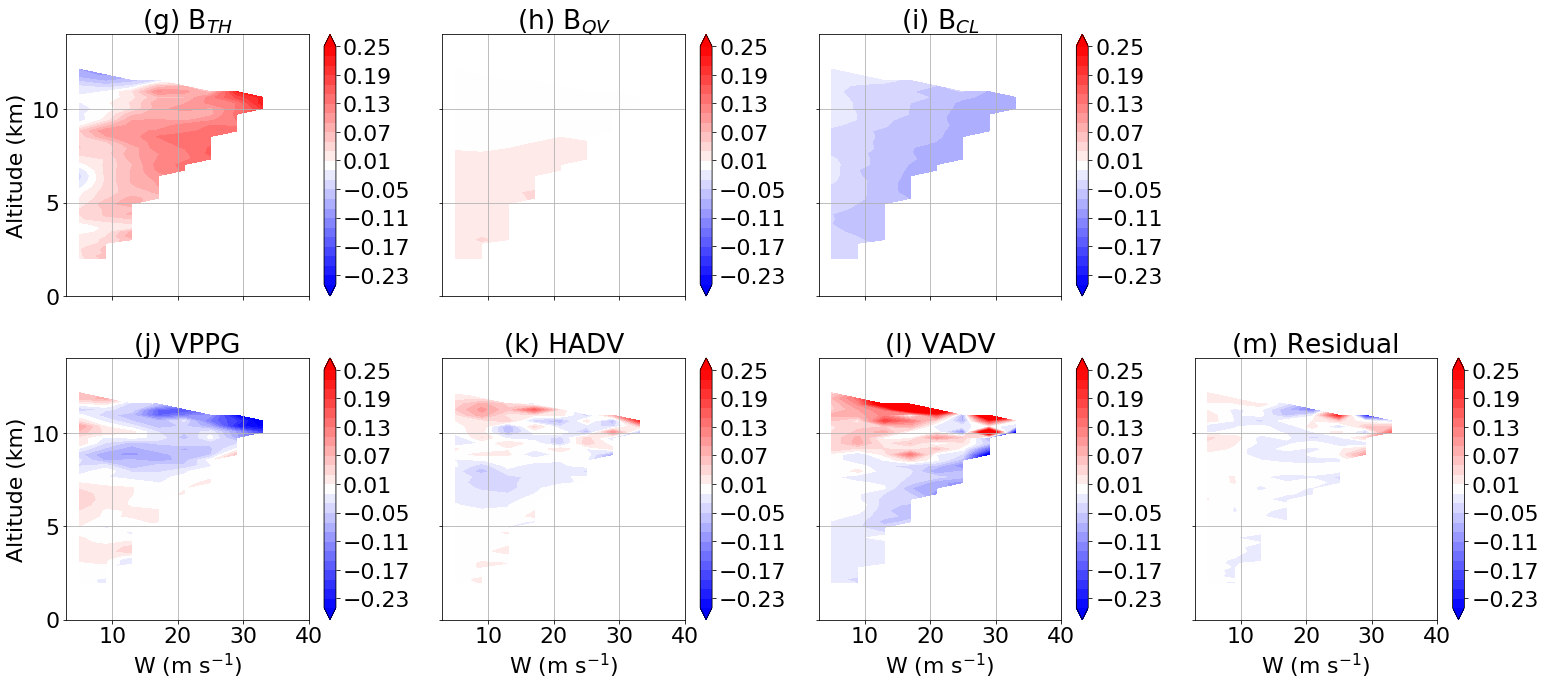

In [144]:
hgts = varBT.coord('geopotential_height').points/1000

ylims = [0,14]
xlims = [3,40]
terms2 = ['(g) B$_{TH}$', '(h) B$_{QV}$', '(i) B$_{CL}$', '(j) VPPG', '(k) HADV', '(l) VADV','(m) Residual']
plt.rcParams.update({'font.size': 22})
xtix = [10,20,30,40]

#fig,ax = plt.subplots(1,7,figsize=[25,4],sharex=True,sharey=True)
#for te in np.arange(0,len(terms)):
#    a = ax[te].contourf(w_range_mid,hgts,np.transpose(w_avg[te,:,:]))
#    plt.colorbar(a,ax=ax[te])
#    ax[te].set_title(terms[te])
#ax[te].set_xlim(xlims)
#ax[te].set_ylim(ylims)
#plt.tight_layout()

lvls = np.arange(-0.25,0.251,0.02)
fig,ax = plt.subplots(2,4,figsize=[22,10],sharex=True,sharey=True)
c0 = 0; c1 = 0;
for te in np.arange(0,len(terms)):
    a = ax[c0,c1].contourf(w_range_mid,hgts,np.transpose(t_avg[te,:,:]),levels=lvls,extend='both',cmap=plt.cm.bwr)
    plt.colorbar(a,ax=ax[c0,c1])
    ax[c0,c1].set_title(terms2[te])
    ax[c0,c1].set_xticks(xtix)
    ax[c0,c1].grid()
    if c1 == 0:
        ax[c0,c1].set_ylabel('Altitude (km)')    
    if c0 == 1:
        ax[c0,c1].set_xlabel('W (m s$^{-1}$)')
    c1 = c1 + 1
    if c1 == 3 and c0 == 0:
        c1 = 0; c0 = 1
        
ax[0,3].set_visible(False)
ax[0,0].set_xlim(xlims)
ax[0,0].set_ylim(ylims)
plt.tight_layout()

In [33]:
# Screen dw_Dr and sum_terms by w > 5 -- 
# plot as scatter -- close to a 1-to-1 suggests that
dw_dt_scr = dw_dt[w_col > 0]
sum_scr = sum_terms[w_col > 0]
sum_scr_noBC = sum_terms_noBC[w_col > 0]
sum_scr_noBV = sum_terms_noBV[w_col > 0]
sum_scr_noPG = sum_terms_noPG[w_col > 0]
sum_scr_noBT = sum_terms_noBT[w_col > 0]
sum_scr_noHA = sum_terms_noHA[w_col > 0]
sum_scr_noVA = sum_terms_noVA[w_col > 0]

In [34]:
print(np.corrcoef(dw_dt_scr,sum_scr)[0,1])
print(np.corrcoef(dw_dt_scr,sum_scr_noBV)[0,1])
print(np.corrcoef(dw_dt_scr,sum_scr_noBC)[0,1])
print(np.corrcoef(dw_dt_scr,sum_scr_noPG)[0,1])
print(np.corrcoef(dw_dt_scr,sum_scr_noBT)[0,1])
print(np.corrcoef(dw_dt_scr,sum_scr_noHA)[0,1])
print(np.corrcoef(dw_dt_scr,sum_scr_noVA)[0,1])

0.9463460160235432
0.9450570860903146
0.917417124604354
0.8368141447061437
0.8734912763105528
0.3308547214119705
0.7274992669414061


[1.12230116 0.00391575]
[ 1.13817352 -0.01123773]
[1.08207729 0.05246628]
[1.18886475 0.01260585]
[ 1.21981732 -0.0439957 ]
[0.75457562 0.00772132]
[0.22799731 0.00201871]


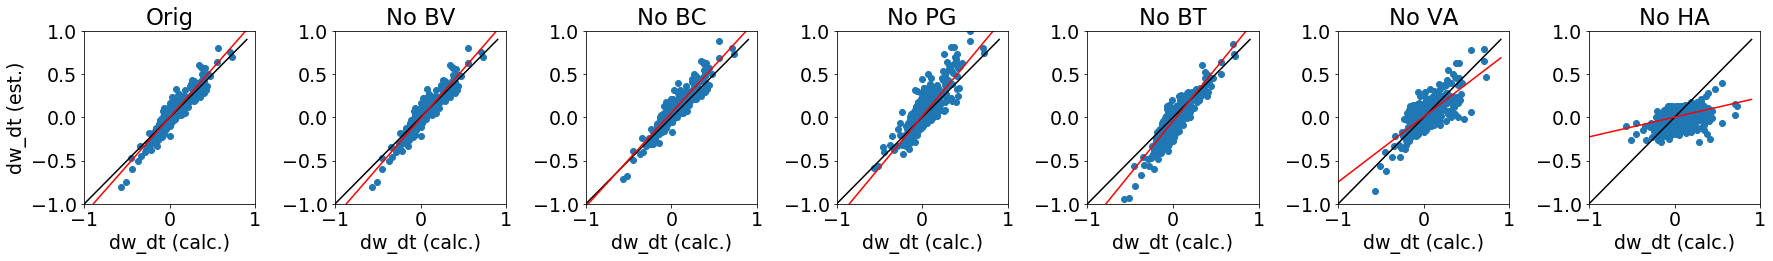

In [38]:
fig,ax = plt.subplots(1,7,figsize=(25,4))
#fig.subplots_adjust(wspace=0.0)
for i in np.arange(0,7):
    if i == 0:
        var1 = sum_scr;
        title = 'Orig'
    elif i == 1:
        var1 = sum_scr_noBV;
        title = 'No BV'
    elif i == 2:
        var1 = sum_scr_noBC;
        title = 'No BC'
    elif i == 3:
        var1 = sum_scr_noPG
        title = 'No PG'
    elif i == 4:
        var1 = sum_scr_noBT
        title = 'No BT'
    elif i == 5:
        var1 = sum_scr_noVA
        title = 'No VA'
    elif i == 6:
        var1 = sum_scr_noHA
        title = 'No HA'
        
    coef = np.polyfit(dw_dt_scr,var1,1)
    poly1d_fn = np.poly1d(coef) 
    print(coef)
    
    ax[i].scatter(dw_dt_scr,var1)
    ax[i].plot(np.arange(-1,1,0.1),np.arange(-1,1,0.1),'-k')
    ax[i].plot(np.arange(-1,1,0.1),poly1d_fn(np.arange(-1,1,0.1)),'-r')
    ax[i].set_xlim([-1,1])
    ax[i].set_ylim([-1,1])
    ax[i].set_xlabel('dw_dt (calc.)')
    ax[i].set_title(title)
    if i == 0:
        ax[i].set_ylabel('dw_dt (est.)')
plt.tight_layout()

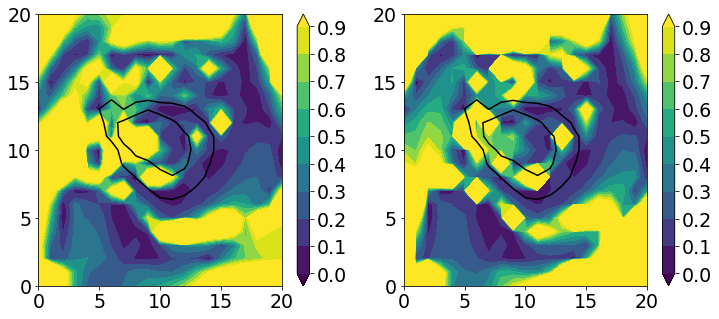

In [36]:
residual = dw_dt[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1] - sum_terms[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1]
pct1 = np.abs(residual) / np.abs(dw_dt[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1])
pct2 = np.abs(residual) / np.abs(sum_terms[zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1])

lvls = np.arange(0,1,0.1)
fig,ax = plt.subplots(1,2,figsize=[12,5])
a = ax[0].contourf(pct1,levels=lvls,extend='both')
b = ax[0].contour(w[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=wlevels,colors='k')
plt.colorbar(a,ax=ax[0])

a = ax[1].contourf(pct2,levels=lvls,extend='both')
b = ax[1].contour(w[tnow,zl,yl-dy:yl+dy+1,xl-dx:xl+dx+1].data,levels=wlevels,colors='k')
plt.colorbar(a,ax=ax[1])

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})


fig,ax = plt.subplots(5,3,figsize=(20,20))

# Plan view slize at zl
a = ax[0,0].contourf(Wmids_tm1[t1,zl,yl-dy:yl+dy,xl-dx:xl+dx].data)
plt.colorbar(a,ax=ax[0,0])
ax[0,0].set_title('W at t=-1')

a = ax[1,0].contourf(Wmids_t0[t1,zl,yl-dy:yl+dy,xl-dx:xl+dx].data)
plt.colorbar(a,ax=ax[1,0])
ax[1,0].set_title('W at t=0')

b = ax[2,0].contourf(dw_dt[t1,zl,yl-dy:yl+dy,xl-dx:xl+dx],levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(b,ax=ax[2,0])
ax[2,0].set_title('dw / dt')
a = ax[2,0].contour(Wmids_t0[t1,zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=wlevels ,colors='k')

a = ax[3,0].contourf(sum_terms[t1,zl,yl-dy:yl+dy,xl-dx:xl+dx],levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[3,0])
ax[3,0].set_title('Sum of Terms')
a = ax[3,0].contour(Wmids_t0[t1,zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=wlevels ,colors='k')

a = ax[4,0].contourf(dw_dt[t1,zl,yl-dy:yl+dy,xl-dx:xl+dx] - sum_terms[zl,yl-dy:yl+dy,xl-dx:xl+dx],levels=clevels2,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[4,0])
ax[4,0].set_title('dw/dt minus Terms Sum')
a = ax[4,0].contour(Wmids_t0[zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=wlevels ,colors='k')


### X cross section
a = ax[0,1].contourf(Wmids_tm1[t1,zl-dz:zl+dz,yl-dy:yl+dy,xl].data)
plt.colorbar(a,ax=ax[0,1])
ax[0,1].set_title('W at t=-1')

a = ax[1,1].contourf(Wmids_t0[t1,zl-dz:zl+dz,yl-dy:yl+dy,xl].data)
plt.colorbar(a,ax=ax[1,1])
ax[1,1].set_title('W at t=0')

b = ax[2,1].contourf(dw_dt[t1,zl-dz:zl+dz,yl-dy:yl+dy,xl],levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(b,ax=ax[2,1])
ax[2,1].set_title('dw / dt')
a = ax[2,1].contour(Wmids_t0[t1,zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=wlevels ,colors='k')

a = ax[3,1].contourf(sum_terms[t1,zl-dz:zl+dz,yl-dy:yl+dy,xl],levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[3,1])
ax[3,1].set_title('Sum of Terms')
a = ax[3,1].contour(Wmids_t0[t1,zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=wlevels ,colors='k')

a = ax[4,1].contourf(dw_dt[t1,zl-dz:zl+dz,yl-dy:yl+dy,xl] - sum_terms[zl-dz:zl+dz,yl-dy:yl+dy,xl],levels=clevels2,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[4,1])
ax[4,1].set_title('dw/dt minus Terms Sum')
a = ax[4,1].contour(Wmids_t0[t1,zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=wlevels ,colors='k')


### Y cross section
a = ax[0,2].contourf(Wmids_tm1[t1,zl-dz:zl+dz,yl,xl-dx:xl+dx].data)
plt.colorbar(a,ax=ax[0,2])
ax[0,2].set_title('W at t=-1')

a = ax[1,2].contourf(Wmids_t0[t1,zl-dz:zl+dz,yl,xl-dx:xl+dx].data)
plt.colorbar(a,ax=ax[1,2])
ax[1,2].set_title('W at t=0')

b = ax[2,2].contourf(dw_dt[t1,zl-dz:zl+dz,yl,xl-dx:xl+dx],levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(b,ax=ax[2,2])
ax[2,2].set_title('dw / dt')
a = ax[2,2].contour(Wmids_t0[zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=wlevels ,colors='k')

a = ax[3,2].contourf(sum_terms[t1,zl-dz:zl+dz,yl,xl-dx:xl+dx],levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[3,2])
ax[3,2].set_title('Sum of Terms')
a = ax[3,2].contour(Wmids_t0[t1,zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=wlevels ,colors='k')

a = ax[4,2].contourf(dw_dt[t1,zl-dz:zl+dz,yl,xl-dx:xl+dx] - sum_terms[zl-dz:zl+dz,yl,xl-dx:xl+dx],levels=clevels2,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[4,2])
ax[4,2].set_title('dw/dt minus Terms Sum')
a = ax[4,2].contour(Wmids_t0[zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=wlevels ,colors='k')



In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig,ax = plt.subplots(5,3,figsize=(20,20))

# Plan view slize at zl
a = ax[0,0].contourf(varPG[0,zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[0,0])
ax[0,0].set_title('VPG')
a = ax[0,0].contour(Wmids_t0[zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=wlevels,colors='k')

a = ax[1,0].contourf(varVA[0,zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[1,0])
ax[1,0].set_title('VA')
a = ax[1,0].contour(Wmids_t0[zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=wlevels,colors='k')

b = ax[2,0].contourf(varHA[0,zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(b,ax=ax[2,0])
ax[2,0].set_title('HA')
a = ax[2,0].contour(Wmids_t0[zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=wlevels,colors='k')

a = ax[3,0].contourf(varBP[0,zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[3,0])
ax[3,0].set_title('BP')
a = ax[3,0].contour(Wmids_t0[zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=wlevels,colors='k')

a = ax[4,0].contourf(varBC[tnow,zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[4,0])
ax[4,0].set_title('BC')
a = ax[4,0].contour(Wmids_t0[zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=wlevels,colors='k')


### X cross section
a = ax[0,1].contourf(varPG[0,zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[0,1])
a = ax[0,1].contour(Wmids_t0[zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=wlevels,colors='k')

a = ax[1,1].contourf(varVA[0,zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[1,1])
a = ax[1,1].contour(Wmids_t0[zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=wlevels,colors='k')

b = ax[2,1].contourf(varHA[0,zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(b,ax=ax[2,1])
a = ax[2,1].contour(Wmids_t0[zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=wlevels,colors='k')

a = ax[3,1].contourf(varBP[0,zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[3,1])
a = ax[3,1].contour(Wmids_t0[zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=wlevels,colors='k')

a = ax[4,1].contourf(varBC[tnow,zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[4,1])
a = ax[4,1].contour(Wmids_t0[zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=wlevels,colors='k')

### Y cross section
a = ax[0,2].contourf(varPG[0,zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[0,2])
a = ax[0,2].contour(Wmids_t0[zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=wlevels,colors='k')

a = ax[1,2].contourf(varVA[0,zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[1,2])
a = ax[1,2].contour(Wmids_t0[zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=wlevels,colors='k')

b = ax[2,2].contourf(varHA[0,zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(b,ax=ax[2,2])
a = ax[2,2].contour(Wmids_t0[zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=wlevels,colors='k')

a = ax[3,2].contourf(varBP[0,zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[3,2])
a = ax[3,2].contour(Wmids_t0[zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=wlevels,colors='k')

a = ax[4,2].contourf(varBC[tnow,zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[4,2])
a = ax[4,2].contour(Wmids_t0[zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=wlevels,colors='k')


In [109]:
from scipy.optimize import curve_fit
def func(x, a, b, c, d, e, f):
    return a*x*x*x*x*x + b*x*x*x*x + c*x*x*x + d*x*x + e*x + f


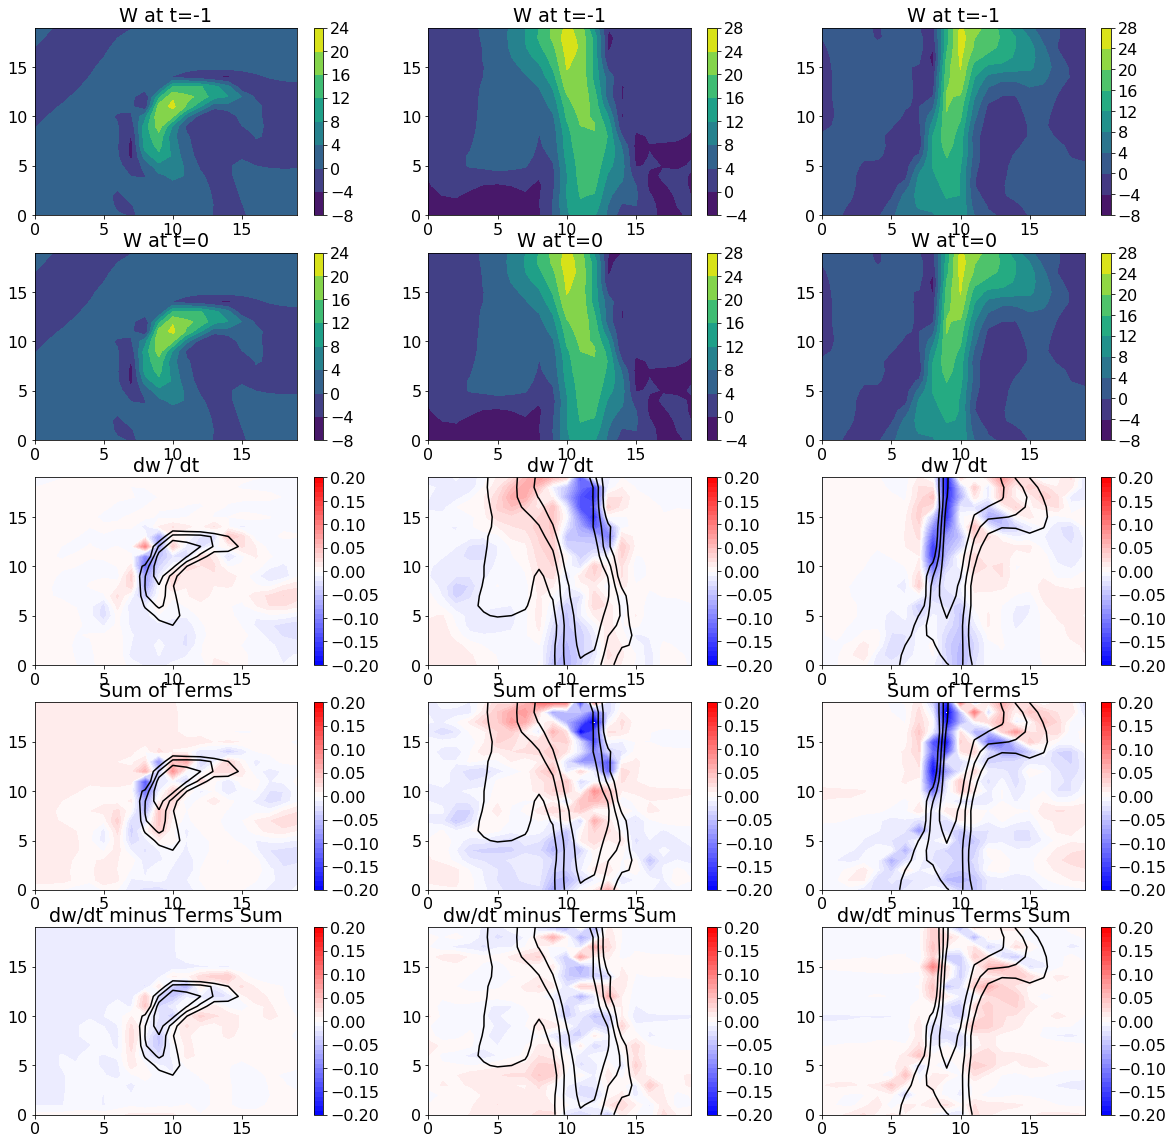

In [110]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig,ax = plt.subplots(5,3,figsize=(20,20))

# Plan view slize at zl
a = ax[0,0].contourf(Wmids_tm1[zl,yl-dy:yl+dy,xl-dx:xl+dx].data)
plt.colorbar(a,ax=ax[0,0])
ax[0,0].set_title('W at t=-1')

a = ax[1,0].contourf(Wmids_t0[zl,yl-dy:yl+dy,xl-dx:xl+dx].data)
plt.colorbar(a,ax=ax[1,0])
ax[1,0].set_title('W at t=0')

b = ax[2,0].contourf(dw_dt[zl,yl-dy:yl+dy,xl-dx:xl+dx],levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(b,ax=ax[2,0])
ax[2,0].set_title('dw / dt')
a = ax[2,0].contour(Wmids_t0[zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=wlevels,colors='k')

a = ax[3,0].contourf(sum_terms[zl,yl-dy:yl+dy,xl-dx:xl+dx],levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[3,0])
ax[3,0].set_title('Sum of Terms')
a = ax[3,0].contour(Wmids_t0[zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=wlevels,colors='k')

a = ax[4,0].contourf(dw_dt[zl,yl-dy:yl+dy,xl-dx:xl+dx] - sum_terms[zl,yl-dy:yl+dy,xl-dx:xl+dx],levels=clevels2,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[4,0])
ax[4,0].set_title('dw/dt minus Terms Sum')
a = ax[4,0].contour(Wmids_t0[zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=wlevels,colors='k')


### X cross section
a = ax[0,1].contourf(Wmids_tm1[zl-dz:zl+dz,yl-dy:yl+dy,xl].data)
plt.colorbar(a,ax=ax[0,1])
ax[0,1].set_title('W at t=-1')

a = ax[1,1].contourf(Wmids_t0[zl-dz:zl+dz,yl-dy:yl+dy,xl].data)
plt.colorbar(a,ax=ax[1,1])
ax[1,1].set_title('W at t=0')

b = ax[2,1].contourf(dw_dt[zl-dz:zl+dz,yl-dy:yl+dy,xl],levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(b,ax=ax[2,1])
ax[2,1].set_title('dw / dt')
a = ax[2,1].contour(Wmids_t0[zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=wlevels,colors='k')

a = ax[3,1].contourf(sum_terms[zl-dz:zl+dz,yl-dy:yl+dy,xl],levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[3,1])
ax[3,1].set_title('Sum of Terms')
a = ax[3,1].contour(Wmids_t0[zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=wlevels,colors='k')

a = ax[4,1].contourf(dw_dt[zl-dz:zl+dz,yl-dy:yl+dy,xl] - sum_terms[zl-dz:zl+dz,yl-dy:yl+dy,xl],levels=clevels2,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[4,1])
ax[4,1].set_title('dw/dt minus Terms Sum')
a = ax[4,1].contour(Wmids_t0[zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=wlevels,colors='k')


### Y cross section
a = ax[0,2].contourf(Wmids_tm1[zl-dz:zl+dz,yl,xl-dx:xl+dx].data)
plt.colorbar(a,ax=ax[0,2])
ax[0,2].set_title('W at t=-1')

a = ax[1,2].contourf(Wmids_t0[zl-dz:zl+dz,yl,xl-dx:xl+dx].data)
plt.colorbar(a,ax=ax[1,2])
ax[1,2].set_title('W at t=0')

b = ax[2,2].contourf(dw_dt[zl-dz:zl+dz,yl,xl-dx:xl+dx],levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(b,ax=ax[2,2])
ax[2,2].set_title('dw / dt')
a = ax[2,2].contour(Wmids_t0[zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=[5,10,15],colors='k')

a = ax[3,2].contourf(sum_terms[zl-dz:zl+dz,yl,xl-dx:xl+dx],levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[3,2])
ax[3,2].set_title('Sum of Terms')
a = ax[3,2].contour(Wmids_t0[zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=[5,10,15],colors='k')

a = ax[4,2].contourf(dw_dt[zl-dz:zl+dz,yl,xl-dx:xl+dx] - sum_terms[zl-dz:zl+dz,yl,xl-dx:xl+dx],levels=clevels2,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[4,2])
ax[4,2].set_title('dw/dt minus Terms Sum')
a = ax[4,2].contour(Wmids_t0[zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=[5,10,15],colors='k')



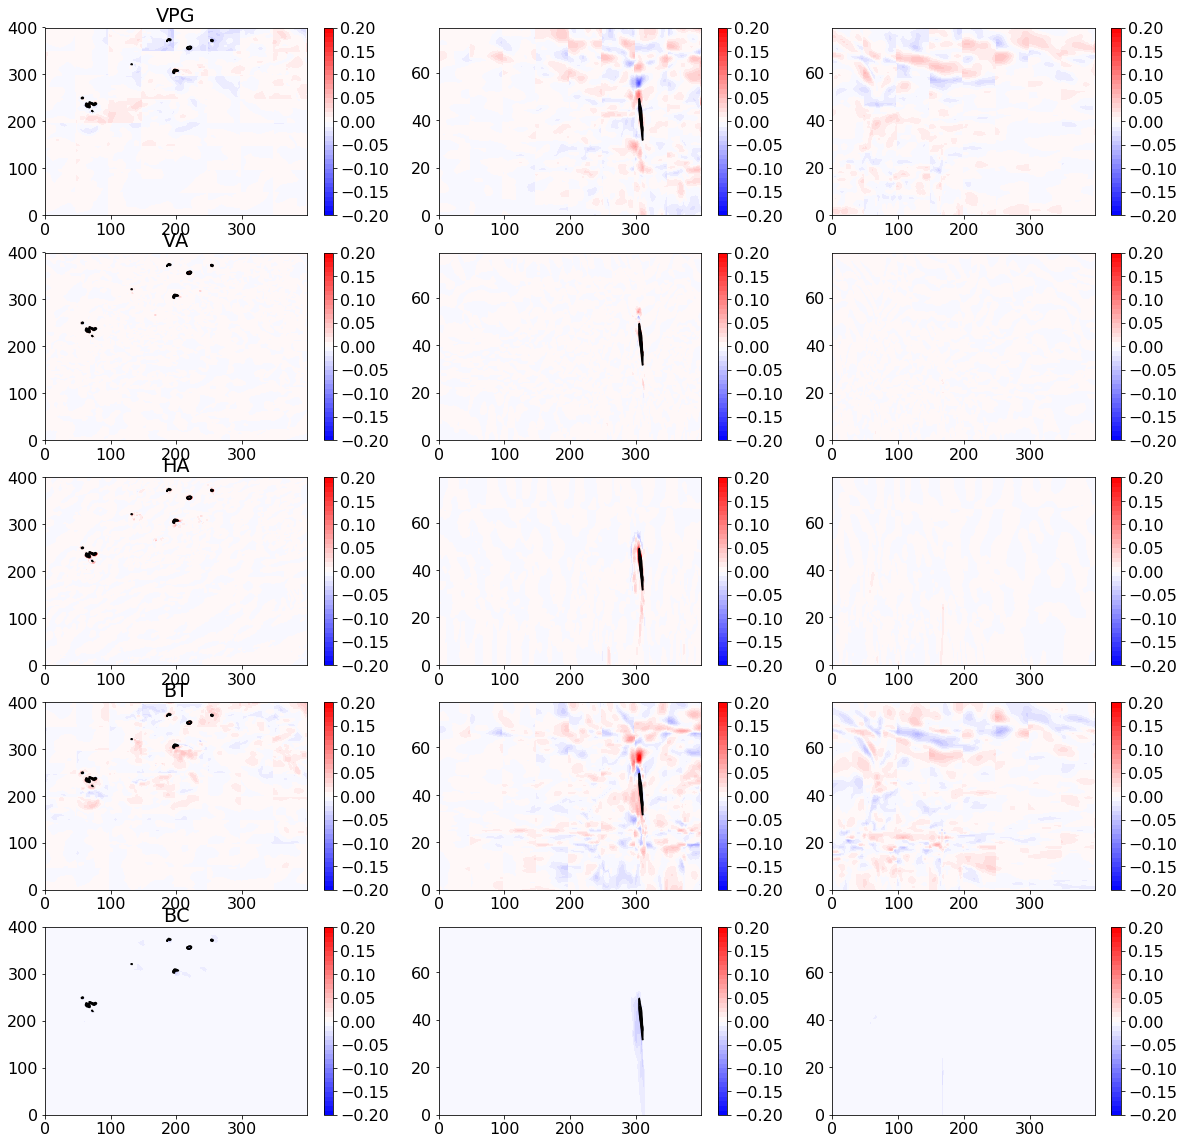

In [36]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig,ax = plt.subplots(5,3,figsize=(20,20))

# Plan view slize at zl
a = ax[0,0].contourf(varPG[0,zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[0,0])
ax[0,0].set_title('VPG')
a = ax[0,0].contour(Wmids_t0[zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=[5,10,15],colors='k')

a = ax[1,0].contourf(varVA[0,zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[1,0])
ax[1,0].set_title('VA')
a = ax[1,0].contour(Wmids_t0[zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=[5,10,15],colors='k')

b = ax[2,0].contourf(varHA[0,zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(b,ax=ax[2,0])
ax[2,0].set_title('HA')
a = ax[2,0].contour(Wmids_t0[zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=[5,10,15],colors='k')

a = ax[3,0].contourf(varBT[0,zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[3,0])
ax[3,0].set_title('BT')
a = ax[3,0].contour(Wmids_t0[zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=[5,10,15],colors='k')

a = ax[4,0].contourf(varBC[tnow,zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[4,0])
ax[4,0].set_title('BC')
a = ax[4,0].contour(Wmids_t0[zl,yl-dy:yl+dy,xl-dx:xl+dx].data,levels=[5,10,15],colors='k')


### X cross section
a = ax[0,1].contourf(varPG[0,zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[0,1])
a = ax[0,1].contour(Wmids_t0[zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=[5,10,15],colors='k')

a = ax[1,1].contourf(varVA[0,zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[1,1])
a = ax[1,1].contour(Wmids_t0[zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=[5,10,15],colors='k')

b = ax[2,1].contourf(varHA[0,zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(b,ax=ax[2,1])
a = ax[2,1].contour(Wmids_t0[zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=[5,10,15],colors='k')

a = ax[3,1].contourf(varBT[0,zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[3,1])
a = ax[3,1].contour(Wmids_t0[zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=[5,10,15],colors='k')

a = ax[4,1].contourf(varBC[tnow,zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[4,1])
a = ax[4,1].contour(Wmids_t0[zl-dz:zl+dz,yl-dy:yl+dy,xl].data,levels=[5,10,15],colors='k')

### Y cross section
a = ax[0,2].contourf(varPG[0,zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[0,2])
a = ax[0,2].contour(Wmids_t0[zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=[5,10,15],colors='k')

a = ax[1,2].contourf(varVA[0,zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[1,2])
a = ax[1,2].contour(Wmids_t0[zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=[5,10,15],colors='k')

b = ax[2,2].contourf(varHA[0,zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(b,ax=ax[2,2])
a = ax[2,2].contour(Wmids_t0[zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=[5,10,15],colors='k')

a = ax[3,2].contourf(varBT[0,zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[3,2])
a = ax[3,2].contour(Wmids_t0[zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=[5,10,15],colors='k')

a = ax[4,2].contourf(varBC[tnow,zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=clevels,cmap=plt.cm.bwr)
plt.colorbar(a,ax=ax[4,2])
a = ax[4,2].contour(Wmids_t0[zl-dz:zl+dz,yl,xl-dx:xl+dx].data,levels=[5,10,15],colors='k')


NameError: name 'var_P_T' is not defined